# **ESERCITAZIONE DI IDROLOGIA**

<figure>
    <img src="Figures/logo_uni.png" width="100" height="100/1.618">
<figure>

UNIVERSITÀ DEGLI STUDI DI TRENTO  
DIPARTIMENTO DI INGEGNERIA CIVILE, AMBIENTALE E MECCANICA  
A.A. 2022-2023
  
*Alunni:*  
Del Dò Giacomo, 221545  
Faccin Francesca, 222028  
Rossato Sofia, 218790

------

# **Notebook 3: WHETGEO1D con i dati di precipitazione della stazione di Valdagno**

Di seguito si riportano i risultati dello studio dell'infiltrazione delle precipitazioni misurate della stazione di Valdagno (VI) durante l'evento dell'alluvione del Veneto del 2010.  
Si è scelto di considerare i valori di precipitazione caduti nell'intervallo temporale che va dal 31/10/2010 al 06/11/2010.  

*Coordinate stazione Valdagno (EPSG:4258): 11.52039317; 45.52434984 (longitudine;latitudine)*.

## **Alluvione del Veneto 2010**

L'alluvione del Veneto del 2010 si è verificata a seguito di una forte perturbazione che ha portato sulla regione persistenti piogge a partire dal 31 ottobre 2010 che, nelle zone prealpline e pedemontane, hanno fatto registrare altezze complessive di precipitazione superiori ai 300mm. A questa si è aggiunto anche il vento caldo di scirocco che, oltre a sciogliere la neve, ha impedito il normale deflusso dei fiumi in mare Adriatico portando così un'aumento delle portate dei principali fiumi del Veneto.  

Analizzando in particolare la situazione nella provincia di Vicenza si può osservare come nella mattinata dell'1 novembre 2010, dopo due giorni di piogge incessanti a cui si devono sommare gli effetti dello scioglimento delle nevi in montagna, il Bacchiglione ha rotto gli argini prima nel comune di Caldogno allagando completamente i centri abitati limitrofi per poi esondare a Vicenza, allagando circa il 20% del capoluogo.

<figure>
    <img src="Figures/mappa_vicenza.png">
<figure>
    Fig.1 "Planimetria del centro urbano di Vicenza con indicazione delle aree allagate durante l'alluvione del 2010".

Dalle elaborazioni della Regione Veneto si osserva come i valori più alti di precipitazione cumulata si hanno nella parte Nord della regione. Il contributo delle piogge, sommato a tutti i fattori descritti prima, ha contribuito all'aumento delle portate nei fiumi delle pianure.  

<figure>
    <img src="Figures/precipitazione_cumulata.jpeg">
<figure>
    Fig.2 "Precipitazione cumulata nel Veneto tra il 31/10/2010 e il 02/11/2010"

## **Stratigrafia del suolo**

Si definisce la stratigrafia della colonna di suolo situata a Vicenza (*lat 45,56  long 11,525*) sulla quale si studia l'infiltrazione.  

<figure>
    <img src="Figures/colonna_suolo.png">
<figure>
    Fig.3 "Profilo di suolo in analisi"

Si riporta poi la griglia computazionale che schematizza la colonna di suolo in esame.  
Per tutte le informazioni ed il procedimento della creazione della griglia si riporta al "Notebook1_Creazione_griglia.ipynb".  

<figure>
    <img src="Figures/ex00_grid.png">
<figure>
    Fig.4 "Griglia del profilo di suolo in analisi"

## **Stazione di Valdagno**

In questo punto si rappresentano graficamente le altezze di precipitazione e le altezze cumulate delle precipitazioni misurate dalla stazione di Valdagno (VI) nell'intervallo temporale che va dal 31/10/2010 al 02/11/2010, giorni in cui le precipitazioni hanno raggiunto il culmine. 

In [1]:
import os
import math

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

from pandas import *
from datetime import datetime
%matplotlib inline 

In [2]:
project_path = os.path.dirname(os.getcwd())
project_path

'/Users/francescafaccin/Desktop/idrologia/Installations05122022/class2023/2_infiltrazione/OMS_Project_WHETGEO1D_23'

In [3]:
precipitazioni_valdagno_input_file_name = project_path + '/data/Timeseries/precip_valdagno.csv'

data_valdagno = pd.read_csv(precipitazioni_valdagno_input_file_name)
map(datetime,data_valdagno['Date'])
data_valdagno = data_valdagno.set_index('Date')

#definisco la funzione cumulata delle altezze di precipitazione 
cumulati_valdagno = np.cumsum(data_valdagno['Rain'])

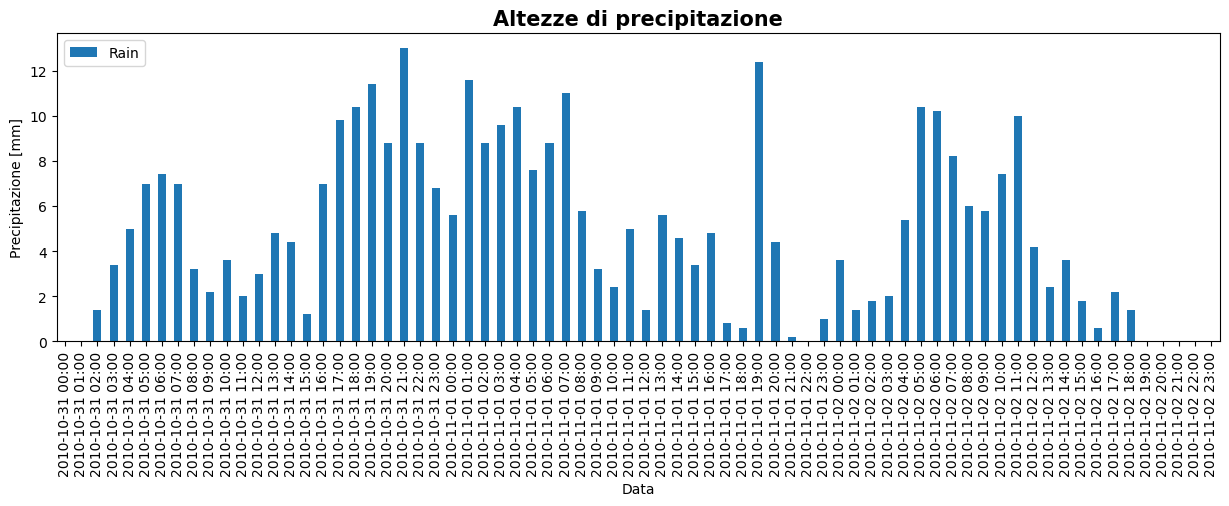

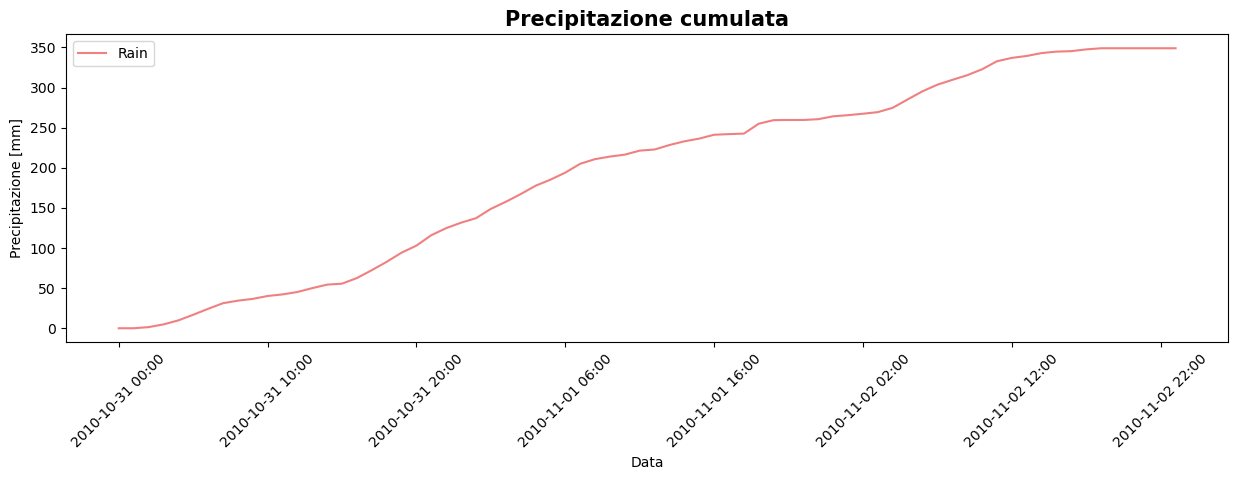

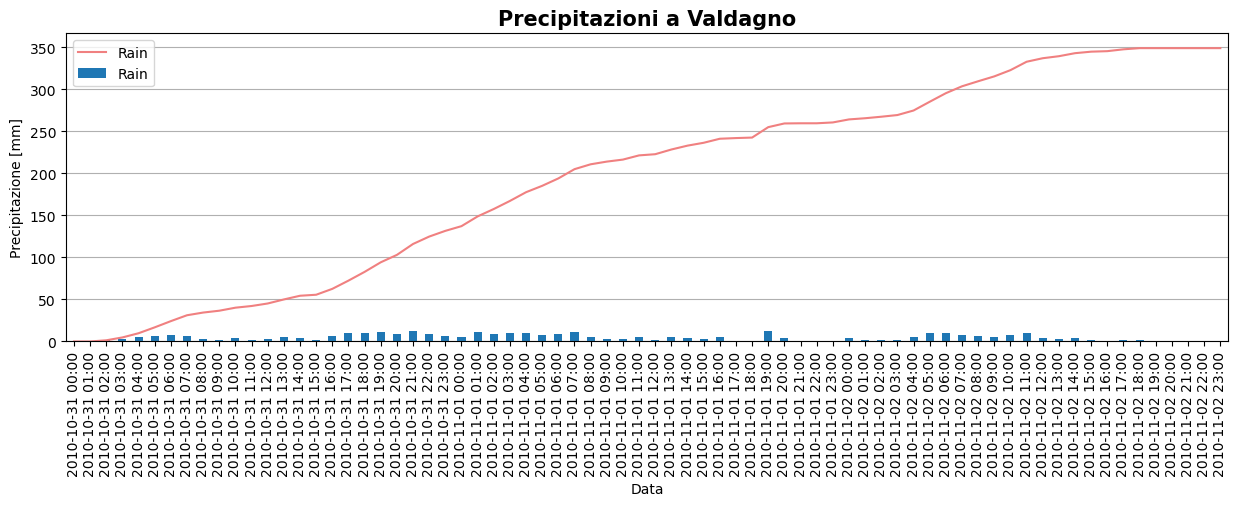

In [4]:
#grafico 1
ax1 = data_valdagno.plot.bar(figsize=(15,4), color='tab:blue')
ax1.xaxis.set_tick_params(rotation=90)
ax1.set_title("Altezze di precipitazione", fontsize=15, fontweight = "bold")
ax1.set_ylabel('Precipitazione [mm]',  fontsize=10)
ax1.set_xlabel("Data",  fontsize=10)
plt.legend(loc='upper left')
plt.show()

#grafico 2
ax2 = cumulati_valdagno.plot(figsize=(15,4), color='lightcoral')
ax2.xaxis.set_tick_params(rotation=45)
ax2.set_title("Precipitazione cumulata", fontsize=15, fontweight = "bold")
ax2.set_ylabel('Precipitazione [mm]',  fontsize=10)
ax2.set_xlabel("Data",  fontsize=10)
plt.legend()
plt.show()

#grafico 3 
ax3 = data_valdagno.plot.bar(figsize=(15,4), color='tab:blue')
ax3 = cumulati_valdagno.plot(figsize=(15,4), color='lightcoral')
ax3.xaxis.set_tick_params(rotation=90)
ax3.set_title("Precipitazioni a Valdagno", fontsize=15, fontweight = "bold")
ax3.set_ylabel('Precipitazione [mm]',  fontsize=10)
ax3.set_xlabel("Data",  fontsize=10)
plt.grid(axis="y", linestyle='solid')
plt.legend()
plt.show()

## **Elaborazione dei dati**

Si esegue il modello WHETGEO1D usando la console OMS eseguendo le righe di codice che portano ad ottenere un output "ex_2906va_0000".

In [5]:
import matplotlib
import math

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.colors as cl 
import matplotlib.style as style 
import plotly.graph_objects as go
import plotly.express as px
import numpy as np
import xarray as xr

from matplotlib import rc
from geoframepy.timeseries import io_csv
%matplotlib inline

style.available
style.use('seaborn-whitegrid')

nice_fonts = {"legend.frameon": True,
              "legend.fancybox": True,
              "legend.facecolor": "white",
              "axes.edgecolor": "0.8",
              "axes.linewidth": 0.6,
              "grid.linewidth":0.4,
              "text.usetex": False,
              "font.family": "serif",
              "axes.labelsize": 12,
              "font.size": 12,
              "legend.fontsize": 10,
              "xtick.labelsize": 10,
              "ytick.labelsize": 10}

my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("",["#ece7f2","#d0d1e6","#a6bddb","#74a9cf","#3690c0","#0570b0","#045a8d","#023858"])
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00']

plt.rcParams.update(nice_fonts)

In [6]:
dp = xr.open_dataset(project_path + '/output/ex_2906va_0000.nc')
dp

<xarray.Dataset>
Dimensions:           (depth: 161, dualDepth: 161, time: 192)
Coordinates:
  * depth             (depth) float64 -1.195 -1.185 -1.175 ... -0.002857 0.0
  * dualDepth         (dualDepth) float64 -1.2 -1.19 -1.18 ... -0.005714 -0.0
  * time              (time) datetime64[ns] 2010-10-29T01:00:00 ... 2010-11-06
Data variables:
    psi               (time, depth) float64 ...
    psiIC             (depth) float64 ...
    T                 (depth) float64 ...
    theta             (time, depth) float64 ...
    saturationDegree  (time, depth) float64 ...
    darcyVelocity     (time, dualDepth) float64 ...
    waterVolume       (time, depth) float64 ...
    error             (time) float64 ...
    topBC             (time) float64 ...
    bottomBC          (time) float64 ...
    runOff            (time) float64 ...
    controlVolume     (depth) float64 ...
Attributes:
    Description_of_the_problem:         WHETGEO-1D ex03 wet initial condition.
    Top_boundary_condition:             Top Coupled
    Bottom_boundary_condition:          Bottom Free drainage
    path_top_boundary_condition:        C:\Users\Asus\OneDrive\Desktop\OMS_Pr...
    path_bottom_boundary_condition:     C:\Users\Asus\OneDrive\Desktop\OMS_Pr...
    path_grid:                          C:\Users\Asus\OneDrive\Desktop\OMS_Pr...
    time_delta:                          
    swrc_model:                         {Water Depth,Van Genuchten}
    soil_hydraulic_conductivity_model:  {null,Mualem Van Genuchten}
    interface_conductivity_model:       max

Innanzitutto, si controlla l'errore per ciascun time step al fine di verificare che il bilancio di massa si chiuda. Il bilancio di massa è un'equazione fondamentale al fine di determinare il deflusso d'acqua nei suoli ed il suo grafico permette di osservare come questo bilancio non sia sempre rispettato, infatti si vede che in vari instanti di tempo sono presenti degli errori più o meno grandi ma che comunque rientrano nell'ordine di grandezza di $e^{-11}$.

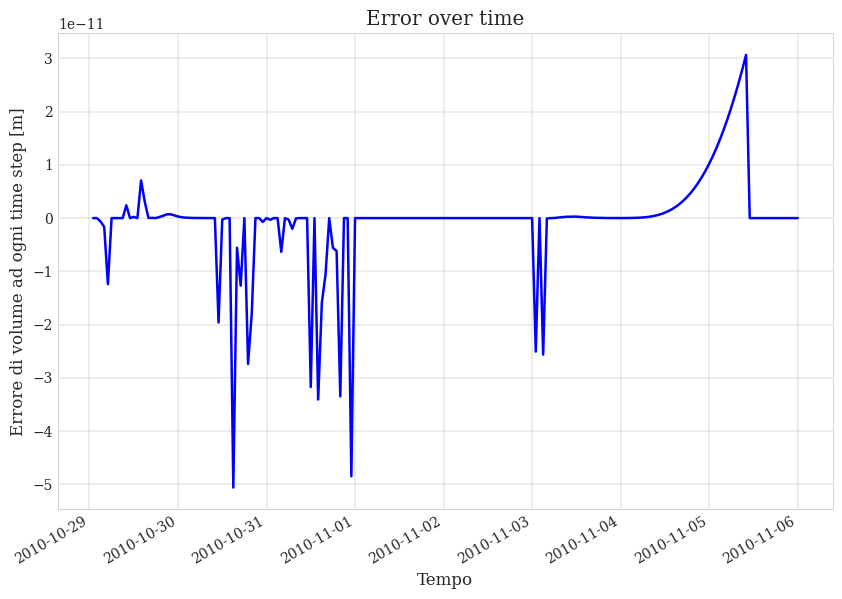

In [7]:
fig = plt.figure(figsize=(10,10/1.618))
ax = dp.error.plot(linewidth=1.8, color='blue')
plt.xlabel('Tempo')
plt.ylabel('Errore di volume ad ogni time step [m]') 
plt.title('Error over time')
plt.grid(color='grey', linestyle='-', linewidth=0.2)

## **Output**

## *Suzione*

In seguito, viene rappresentato un grafico 2D che descrive l'andamento della suzione in funzione del tempo e della profondità.

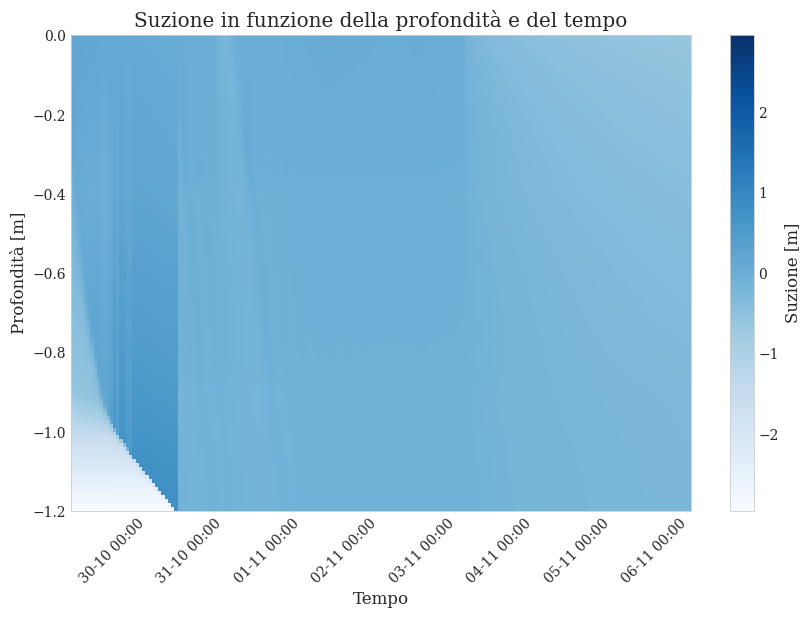

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,10/1.618))

dp.psi.plot(ax=ax, y='depth', cmap='Blues', 
            cbar_kwargs={'label': 'Suzione [m]'}
           )

ax.set_title('Suzione in funzione della profondità e del tempo')
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.show()

## *Contenuto d'acqua e grado di saturazione del terreno*

In seguito, si rappresenta un grafico 2D che illustra il contenuto d'acqua presente nella colonna di suolo presa in esame in funzione della profondità e del tempo. 
Si può notare che il grafico del contenuto d'acqua è molto simile sia per il caso delle precipitazioni di valdagno sia per quelle di vicenza, ma nel caso sottostante si denota un maggiore contenuto d'acqua nella fascia centrale.

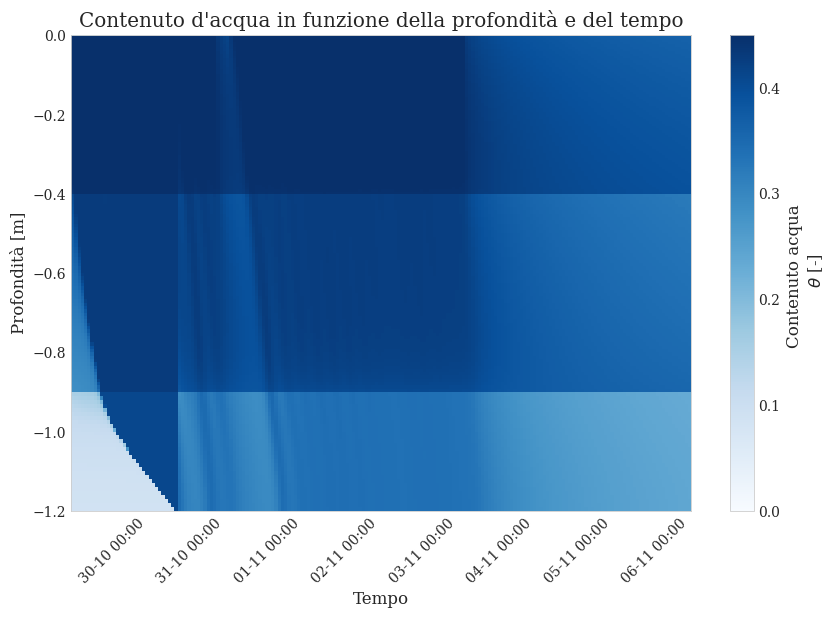

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(10,10/1.618))

dp.theta.plot(ax=ax, y='depth', cmap='Blues', 
            cbar_kwargs={'label': 'Contenuto acqua \n $\\theta$ [-]'}
           )

ax.set_title("Contenuto d'acqua in funzione della profondità e del tempo")
ax.set_ylabel('Profondità [m]')
ax.set_xlabel('Tempo')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m %H:%M'))
ax.xaxis.set_tick_params(rotation=45)

plt.show()

Il grafico 2D che descrive il grado di saturazione del terreno in funzione del tempo e della profondità è affine a quello soprastante data la dipendenza esplicita del grado di saturazione dal contenuto d'acqua.

## *Variazione del fronte d'acqua a diversi tempi*

In questa sezione si valuta il movimento del fronte d'acqua in diversi istanti di tempo.  

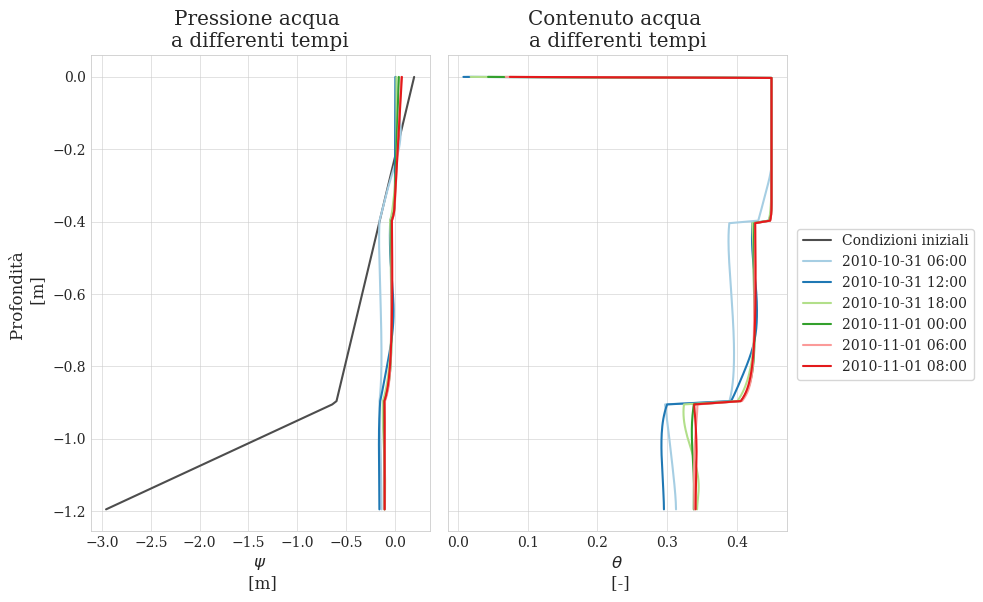

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey='row', figsize=(10, 10/1.618)) 

dp.psiIC.plot(ax=ax1, y='depth', label='Condizioni iniziali', color='0.3')
dp.psi.sel(time='2010-10-31 06:00').plot(ax=ax1, y='depth', label='2010-10-31 06:00', color=colors[0])
dp.psi.sel(time='2010-10-31 12:00').plot(ax=ax1, y='depth', label='2010-10-31 12:00', color=colors[1])
dp.psi.sel(time='2010-10-31 18:00').plot(ax=ax1, y='depth', label='2010-10-31 18:00', color=colors[2])
dp.psi.sel(time='2010-11-01 00:00').plot(ax=ax1, y='depth', label='2010-11-01 00:00', color=colors[3])
dp.psi.sel(time='2010-11-01 06:00').plot(ax=ax1, y='depth', label='2010-11-01 06:00', color=colors[4])
dp.psi.sel(time='2010-11-01 08:00').plot(ax=ax1, y='depth', label='2010-11-01 08:00', color=colors[5])

ax1.set_title('Pressione acqua \na differenti tempi')

ax1.set_ylabel('Profondità \n [m]')
ax1.set_xlabel('$\psi$ \n [m]')

plt.plot(np.nan, np.nan, label='Condizioni iniziali', color='0.3')
dp.theta.sel(time='2010-10-31 06:00').plot(ax=ax2, y='depth', label='2010-10-31 06:00', color=colors[0])
dp.theta.sel(time='2010-10-31 12:00').plot(ax=ax2, y='depth', label='2010-10-31 12:00', color=colors[1])
dp.theta.sel(time='2010-10-31 18:00').plot(ax=ax2, y='depth', label='2010-10-31 18:00', color=colors[2])
dp.theta.sel(time='2010-11-01 00:00').plot(ax=ax2, y='depth', label='2010-11-01 00:00', color=colors[3])
dp.theta.sel(time='2010-11-01 06:00').plot(ax=ax2, y='depth', label='2010-11-01 06:00', color=colors[4])
dp.theta.sel(time='2010-11-01 08:00').plot(ax=ax2, y='depth', label='2010-11-01 08:00', color=colors[5])

ax2.set_title('Contenuto acqua \na differenti tempi')
ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

ax2.set_ylabel('')
ax2.set_xlabel('$\\theta$ \n [-]')

plt.tight_layout()
plt.show()

## *Variazione del fronte d'acqua a diverse profondità*

In questa sezione si valuta il movimento del fronte d'acqua a diverse profondità.

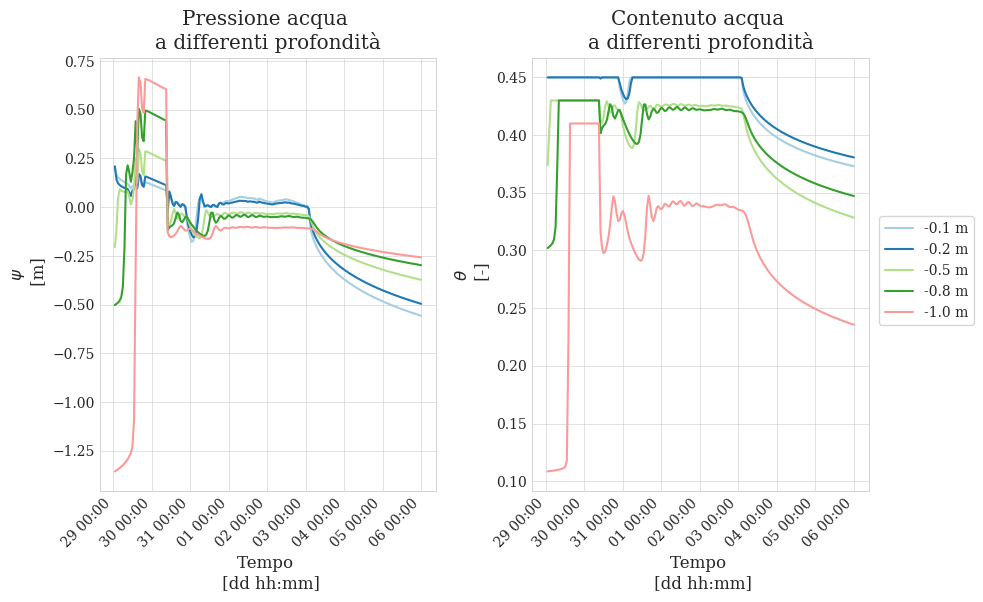

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10/1.618)) 

dp.psi.sel(depth=-0.1, method='nearest').plot(ax=ax1, color=colors[0])
dp.psi.sel(depth=-0.2, method='nearest').plot(ax=ax1, color=colors[1])
dp.psi.sel(depth=-0.5, method='nearest').plot(ax=ax1, color=colors[2])
dp.psi.sel(depth=-0.8, method='nearest').plot(ax=ax1, color=colors[3])
dp.psi.sel(depth=-1.0, method='nearest').plot(ax=ax1, color=colors[4])

ax1.set_title('Pressione acqua \na differenti profondità')


ax1.set_ylabel('$\psi$ \n [m]')
ax1.set_xlabel('Tempo \n [dd hh:mm]')

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax1.xaxis.set_tick_params(rotation=45)

dp.theta.sel(depth=-0.1, method='nearest').plot(ax=ax2, label = '-0.1 m', color=colors[0])
dp.theta.sel(depth=-0.2, method='nearest').plot(ax=ax2, label = '-0.2 m', color=colors[1])
dp.theta.sel(depth=-0.5, method='nearest').plot(ax=ax2, label = '-0.5 m', color=colors[2])
dp.theta.sel(depth=-0.8, method='nearest').plot(ax=ax2, label = '-0.8 m', color=colors[3])
dp.theta.sel(depth=-1.0, method='nearest').plot(ax=ax2, label = '-1.0 m', color=colors[4])

ax2.set_title('Contenuto acqua \na differenti profondità')


ax2.set_ylabel('$\\theta$ \n [-]')
ax2.set_xlabel('Tempo \n [dd hh:mm]')

ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d %H:%M'))
ax2.xaxis.set_tick_params(rotation=45)

ax2.legend(bbox_to_anchor=(1.01,0.65), ncol=1)

plt.tight_layout()
plt.show()

## *Confronto tra precipitazioni e suzione*

In [12]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/precip_2906va.csv',datetime_index=False)
rain.head()

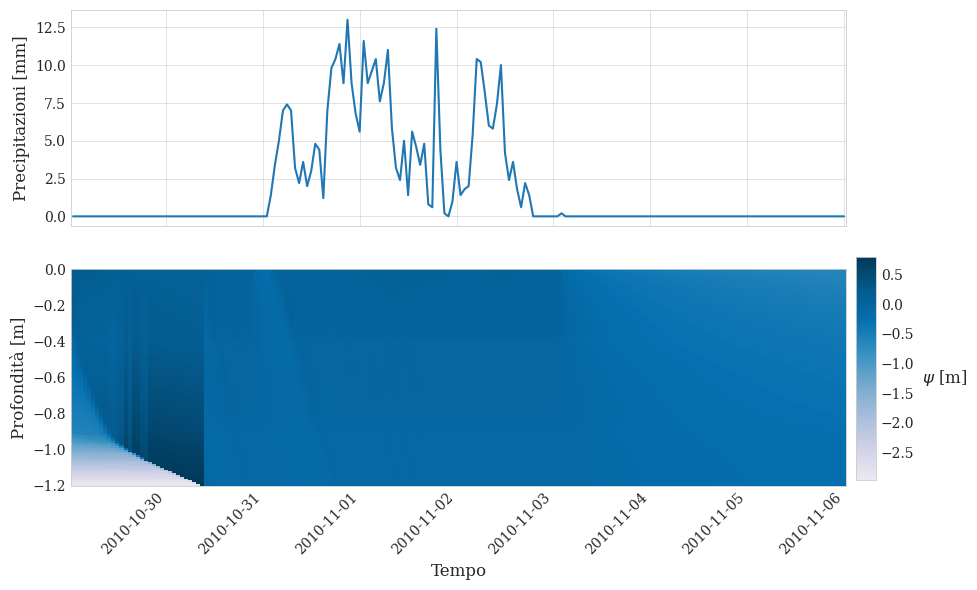

In [13]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(dp.psi.values), vmax=np.amax(dp.psi.values))

ax[0].plot(dp.time.values, rain['0'])
ax[0].set_ylabel('Precipitazioni [mm]')


a = dp.psi.plot(ax=ax[1], y='depth',add_colorbar=False, cmap=my_cmap, norm=norm)

ax[1].set_ylabel('Profondità [m]')
ax[1].set_xlabel('Tempo')



ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=45)


cbar_ax = fig.add_axes([0.91, 0.12, 0.02, 0.36])

sm = plt.cm.ScalarMappable(cmap=my_cmap, norm=norm)
cbar = fig.colorbar(sm, cax=cbar_ax)
cbar.set_label('$\\psi$ [m]', rotation=0, labelpad=22)

plt.show()

## *Top flux*

In seguito, viene rappresentato un grafico che descrive la variazione e l'andamento della velocità di Darcy durante la durata della nostra simulazione. La velocità di Darcy viene definita come il flusso attraverso area unitaria del mezzo poroso quindi non è altro che la velocità di deflusso della precipitazione attraverso il terreno. 

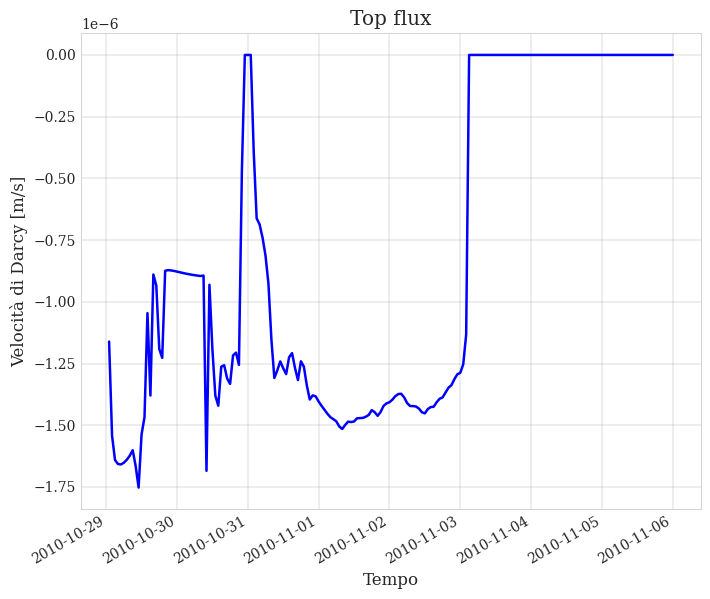

In [14]:
fig = plt.figure(figsize=(8,10/1.618))
dp.darcyVelocity.sel(dualDepth=dp.dualDepth[len(dp.dualDepth)-1], time=dp.time.values[:]).plot(linewidth=1.8,color='blue')
plt.title('Top flux')
plt.ylabel('Velocità di Darcy [m/s]')
plt.xlabel('Tempo')
plt.grid(color='grey', linestyle='-', linewidth=0.2)

## *Confronto tra precipitazioni e run off*

In [15]:
rain = io_csv.pandas_read_OMS_timeseries(project_path + '/data/Timeseries/precip_2906vi.csv',datetime_index=False)
rain.head()

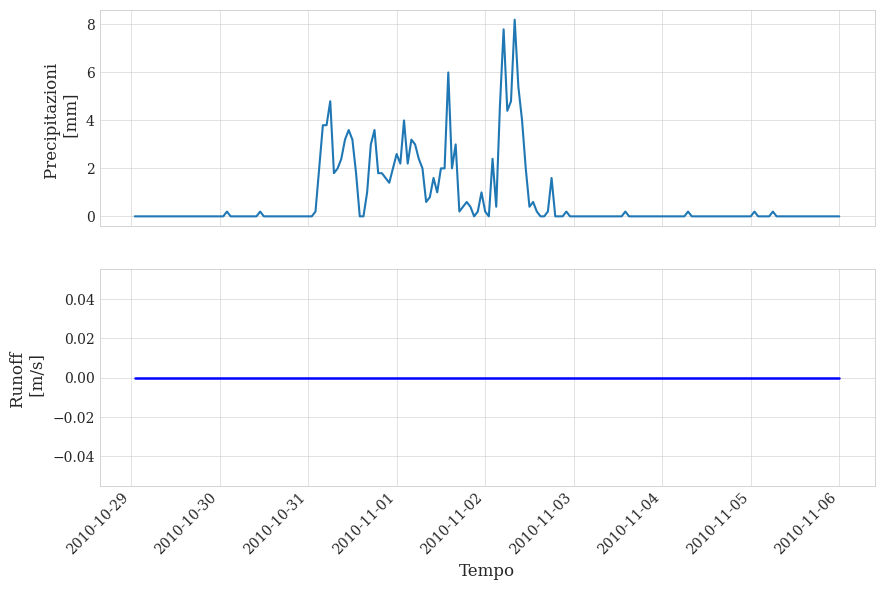

In [16]:
fig, ax = plt.subplots(2, 1, sharex='col', figsize=(10, 10/1.618)) 
norm = matplotlib.colors.Normalize(vmin=np.amin(dp.psi.values), vmax=np.amax(dp.psi.values))

ax[0].plot(dp.time.values, rain['0'])
ax[0].set_ylabel('Precipitazioni \n [mm]')


a = dp.runOff.sel(time=dp.time.values[:]).plot(linewidth=1.8,color='blue')


ax[1].set_ylabel('Runoff \n [m/s]')
ax[1].set_xlabel('Tempo')



ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_tick_params(rotation=45)

plt.show()